# Loading packages

In [29]:
library(tidyverse)
library(ggplot2)
library(skimr)
library(janitor)
options(repr.plot.width=8, repr.plot.height=6)

# Importing data

In [2]:
trip_data <- read_csv(file = "D:\\Hell\\dataset case study\\trip_data.csv")

Rows: 769204 Columns: 12
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (8): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (2): ride_length_second, day_of_week
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
trip_data <- tibble(trip_data)

In [4]:
skim_without_charts(trip_data)

── Data Summary ────────────────────────
                           Values   
Name                       trip_data
Number of rows             769204   
Number of columns          12       
_______________________             
Column type frequency:              
  character                8        
  numeric                  2        
  POSIXct                  2        
________________________            
Group variables            None     

── Variable type: character ────────────────────────────────────────────────────
  skim_variable      n_missing complete_rate min max empty n_unique whitespace
1 ride_id                    0             1  16  16     0   769204          0
2 rideable_type              0             1  11  13     0        3          0
3 start_station_name         0             1   7  53     0     1158          0
4 start_station_id           0             1   3  35     0     1063          0
5 end_station_name           0             1  10  53     0     1181        

Warning message in is.null(text_repr) || nchar(text_repr) == 0L:
"'length(x) = 3 > 1' in coercion to 'logical(1)'"


,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,POSIXct.min,POSIXct.max,POSIXct.median,POSIXct.n_unique
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dttm>,<dttm>,<int>
1,character,ride_id,0,1,16,16,0,769204,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,character,rideable_type,0,1,11,13,0,3,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,character,start_station_name,0,1,7,53,0,1158,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,character,start_station_id,0,1,3,35,0,1063,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,character,end_station_name,0,1,10,53,0,1181,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,character,end_station_id,0,1,3,36,0,1079,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,character,member_casual,0,1,6,6,0,2,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
8,character,track,0,1,24,110,0,88819,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
9,numeric,ride_length_second,0,1,NA,NA,NA,NA,NA,1360.908377,12913.165219,-8245,405,713,1257,2149238,NA,NA,NA,NA


Bedasarkan summary data diatas, pada kolom ride_length_second ditemukan adanya nilai negatif. Hal ini berarti ada data yang tidak valid pada kolom started_at atau ended_at, dimana waktu mulai lebih besar dibanding waktu selesai.

# Data Cleaning

Pertama-tama, saya akan memastikan bahwa nama kolom sesuai dengan prinsip clean data dengan menggunakan fungsi clean_names

In [5]:
trip_data <- clean_names(trip_data)

Selanjutnya saya akan memeriksa jumlah data yang salah dengan kriteria nilai waktu selesai lebih dulu daripada waktu mulai

In [6]:
length(filter(trip_data, started_at > ended_at))

[1] 12

Karena jumlah data yang tidak terlalu banyak, maka saya dapat langsung menghapus data yang tidak valid tersebut

In [7]:
trip_data <- trip_data[!(trip_data$started_at > trip_data$ended_at),]

Selanjutnya saya akan mengganti nilai pada kolom day_of_week menjadi nama hari yang sesuai dengan nilai pada kolom tersebut

In [8]:
trip_data$day_of_week <- format(as.Date(trip_data$started_at), "%A")

# Data Analysis

Pertama-tama saya akan menghitung summary statistics dari kolom ride_length_second

In [9]:
summarize(trip_data, 
        mean = mean(ride_length_second), 
        median = median(ride_length_second),
        min = min(ride_length_second),
        max = max(ride_length_second))

mean,median,min,max
<dbl>,<dbl>,<dbl>,<dbl>
1361.009,713,0,2149238


Rata-rata waktu perjalanan = 1361 detik

Nilai tengah = 713 detik

Perjalanan tersingkat = 0 detik

Perjalanan terlama = 2139238 detik

## Membandingkan annual members dan casual riders

In [10]:
aggregate(trip_data,ride_length_second ~ member_casual, FUN = mean)

member_casual,ride_length_second
<chr>,<dbl>
casual,1925.9766
member,839.9561


In [11]:
aggregate(trip_data,ride_length_second ~ member_casual, FUN = median)

member_casual,ride_length_second
<chr>,<dbl>
casual,861
member,602


In [12]:
aggregate(trip_data,ride_length_second ~ member_casual, FUN = min)

member_casual,ride_length_second
<chr>,<dbl>
casual,0
member,0


In [13]:
aggregate(trip_data,ride_length_second ~ member_casual, FUN = max)

member_casual,ride_length_second
<chr>,<dbl>
casual,2149238
member,89997


In [14]:
aggregate(trip_data,ride_length_second ~ member_casual + day_of_week, FUN = mean)

member_casual,day_of_week,ride_length_second
<chr>,<chr>,<dbl>
casual,Jumat,1958.4941
member,Jumat,828.1977
casual,Kamis,1811.7459
member,Kamis,822.2989
casual,Minggu,2168.2113
member,Minggu,941.0249
casual,Rabu,1743.9403
member,Rabu,786.3334
casual,Sabtu,1933.5799


Dapat dilihat bahwa kolom day_of week tidak terurut sesuai dengan harinya. Saya akan merapikan kolom tersebut

In [15]:
trip_data$day_of_week <- ordered(trip_data$day_of_week, levels=c("Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu","Minggu"))

In [16]:
aggregate(trip_data,ride_length_second ~ member_casual + day_of_week, FUN = mean)

member_casual,day_of_week,ride_length_second
<chr>,<ord>,<dbl>
casual,Senin,1888.6294
member,Senin,805.1215
casual,Selasa,1888.6166
member,Selasa,818.6931
casual,Rabu,1743.9403
member,Rabu,786.3334
casual,Kamis,1811.7459
member,Kamis,822.2989
casual,Jumat,1958.4941


## Menganalisis data pengguna berdasarkan jenis dan hari

Selanjutnya saya akan mencari nilai jumlah perjalanan dan rata-rata lama perjalanan pada setiap jenis member setiap harinya

In [17]:
trip_data %>% 
    group_by(member_casual, day_of_week) %>% 
    summarize(number_of_rides = n(), average_duration_min = mean(ride_length_second)/60) %>% 
    arrange(day_of_week,member_casual)

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.


member_casual,day_of_week,number_of_rides,average_duration_min
<chr>,<ord>,<int>,<dbl>
casual,Senin,37004,31.47716
member,Senin,46791,13.41869
casual,Selasa,38819,31.47694
member,Selasa,54982,13.64489
casual,Rabu,48387,29.06567
member,Rabu,68797,13.10556
casual,Kamis,57978,30.19577
member,Kamis,73500,13.70498
casual,Jumat,55868,32.64157


Agar dapat lebih mudah dipahami, saya akan membuat visualisasi dari data tersebut

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.


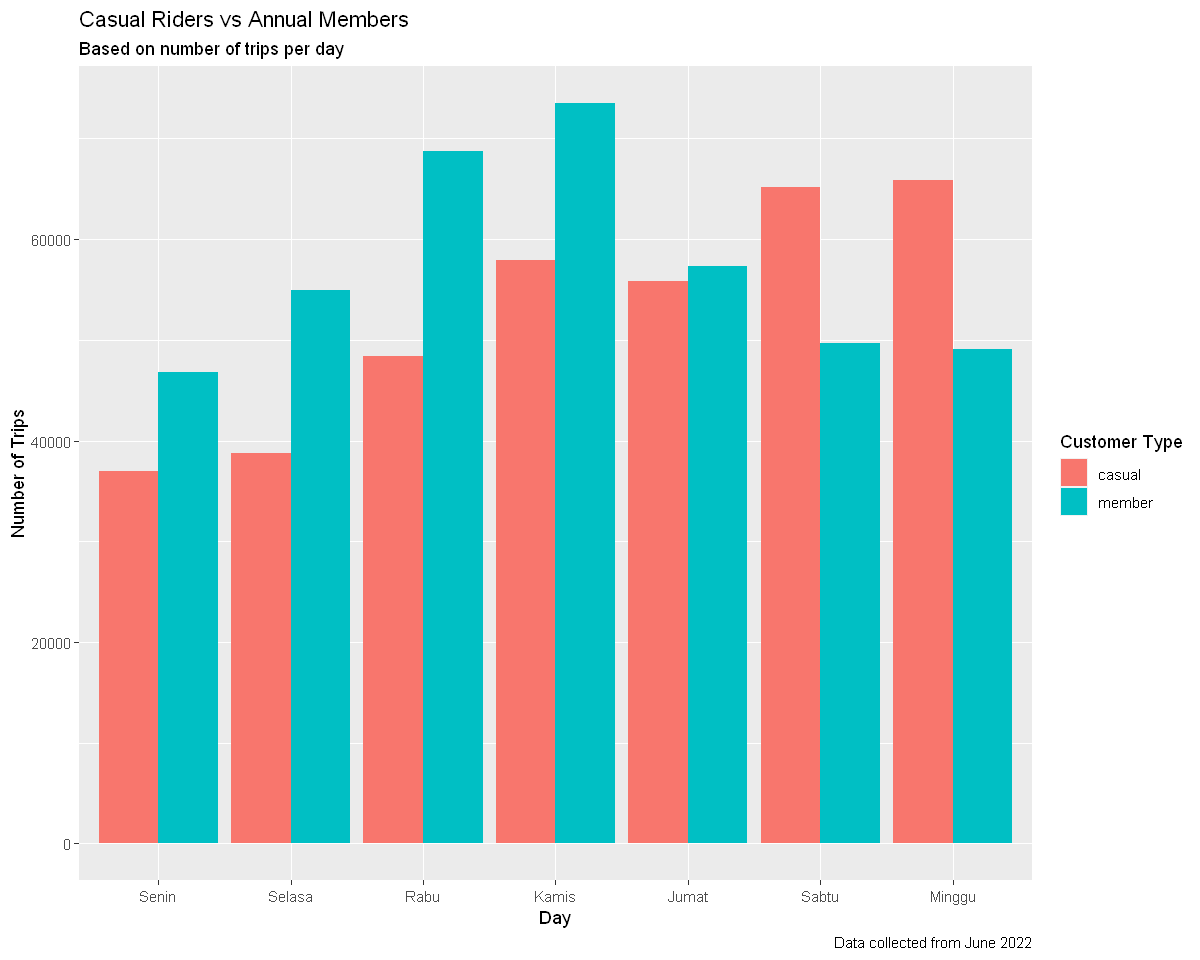

In [34]:
trip_data %>% 
    group_by(member_casual, day_of_week) %>% 
    summarize(number_of_rides = n(), average_duration_min = mean(ride_length_second)/60) %>% 
    arrange(day_of_week,member_casual) %>% 
    ggplot(aes(x = day_of_week, y= number_of_rides, fill = member_casual)) +
    geom_col(position = "dodge") + 
    labs(
    title = "Casual Riders vs Annual Members",
    subtitle = "Based on number of trips per day",
    caption = "Data collected from June 2022",
    x = "Day",
    y = "Number of Trips",
    fill='Customer Type'
    )

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.


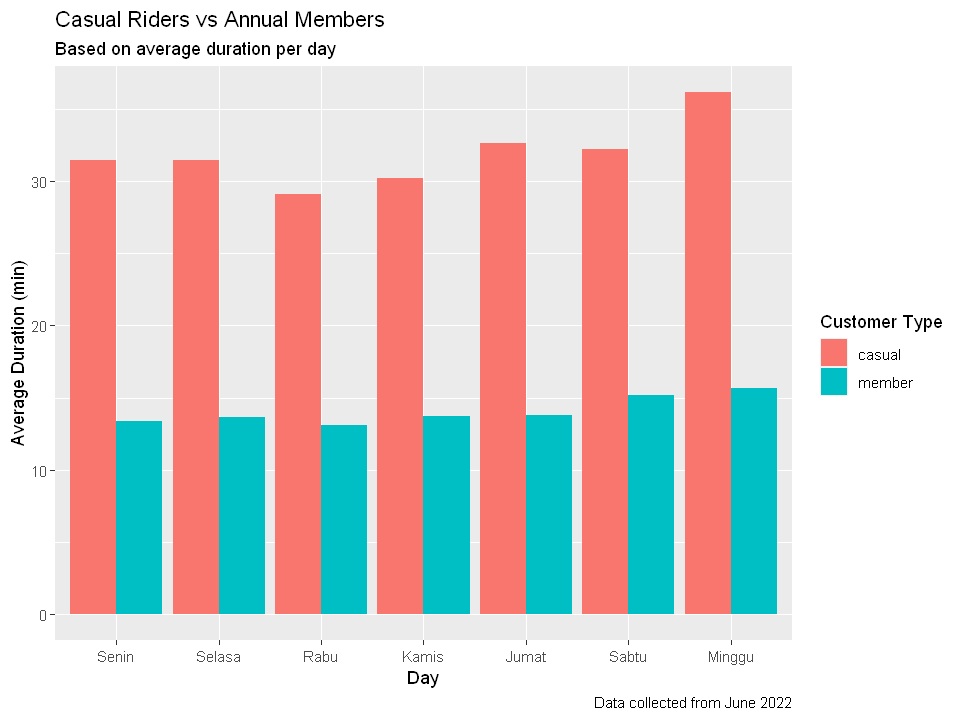

In [31]:
trip_data %>% 
    group_by(member_casual, day_of_week) %>% 
    summarize(number_of_rides = n(), average_duration_min = mean(ride_length_second)/60) %>% 
    arrange(day_of_week,member_casual) %>% 
    ggplot(aes(x = day_of_week, y= average_duration_min, fill = member_casual)) +
    geom_col(position = "dodge") +
    labs(
    title = "Casual Riders vs Annual Members",
    subtitle = "Based on average duration per day",
    caption = "Data collected from June 2022",
    x = "Day",
    y = "Average Duration (min)",
    fill='Customer Type'
    )

Selanjutnya saya akan mencari rute favorit dari masing-masing jenis member

In [20]:
trip_data %>% 
    group_by(member_casual, track) %>% 
    filter(start_station_name != 'unrecorded' | end_station_name != 'unrecorded') %>% 
    summarize(number_of_trips = n()) %>% 
    arrange(desc(number_of_trips)) %>% 
    slice(1:5) 

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.


member_casual,track,number_of_trips
<chr>,<chr>,<int>
casual,Streeter Dr & Grand Ave to Streeter Dr & Grand Ave,1660
casual,DuSable Lake Shore Dr & Monroe St to DuSable Lake Shore Dr & Monroe St,987
casual,Michigan Ave & Oak St to Michigan Ave & Oak St,852
casual,DuSable Lake Shore Dr & Monroe St to Streeter Dr & Grand Ave,830
casual,Millennium Park to Millennium Park,605
member,Streeter Dr & Grand Ave to Streeter Dr & Grand Ave,268
member,Loomis St & Lexington St to Halsted St & Polk St,230
member,Ellis Ave & 55th St to Kimbark Ave & 53rd St,216
member,Kimbark Ave & 53rd St to Ellis Ave & 55th St,200


Agar lebih mudah dimengerti, saya akan membuat visualisasi data dari data diatas

In [21]:
popular_track <- trip_data %>% 
    group_by(member_casual, track) %>% 
    filter(start_station_name != 'unrecorded' | end_station_name != 'unrecorded') %>% 
    summarize(number_of_trips = n()) %>% 
    arrange(desc(number_of_trips)) %>% 
    slice(1:5)

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.


In [32]:
options(repr.plot.width=10, repr.plot.height=8)

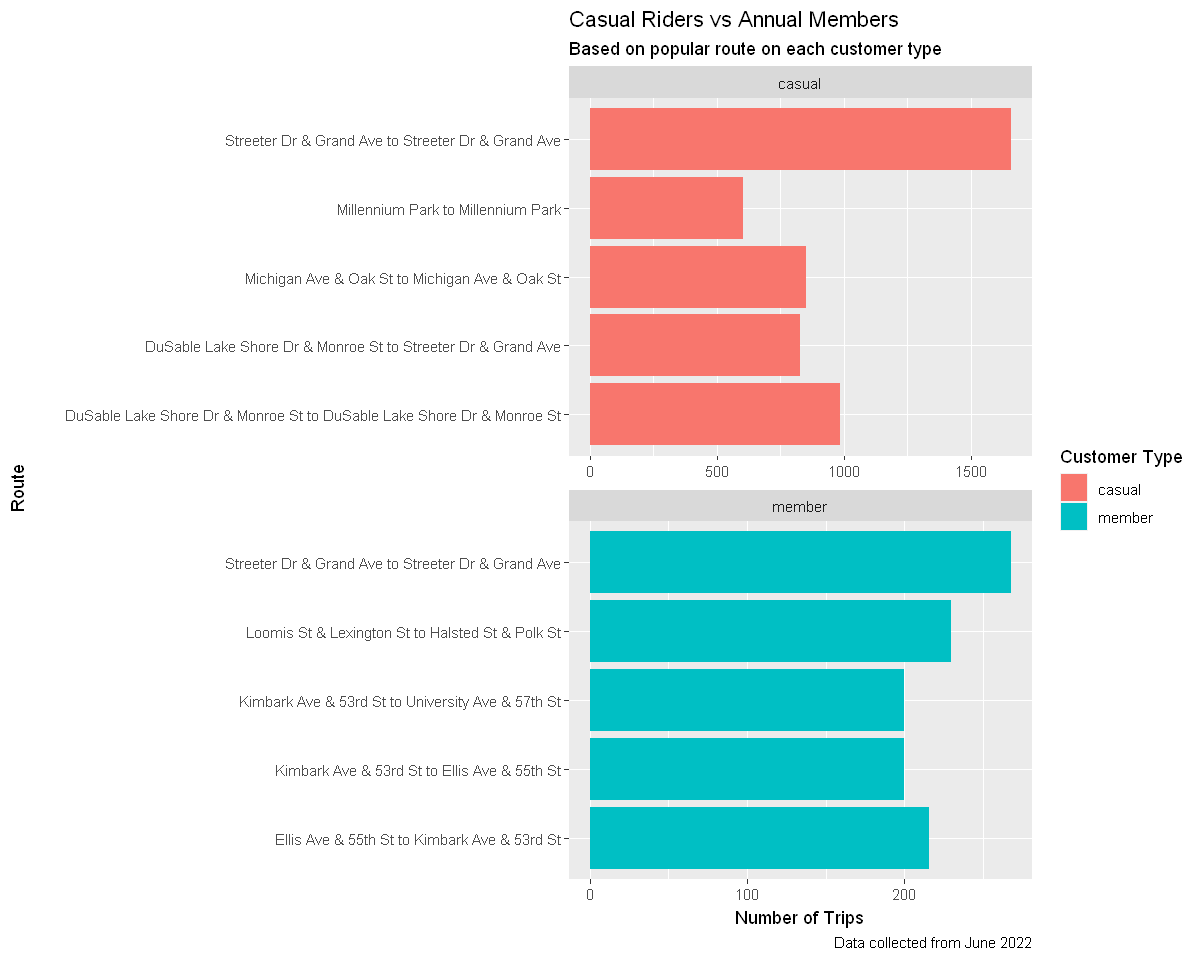

In [33]:
ggplot(data = popular_track, aes(x = number_of_trips, y = track, fill = member_casual)) +
geom_col() + 
facet_wrap(~member_casual, scales = "free", ncol = 1) +
labs(
    title = "Casual Riders vs Annual Members",
    subtitle = "Based on popular route on each customer type",
    caption = "Data collected from June 2022",
    x = "Number of Trips",
    y = "Route",
    fill='Customer Type'
    )  